# Visualization Techniques in Data Analysis
By Tessa Munoz
## Introduction

As technology advances and the need for understanding larger data increases, data visualization techniques are an extremely important tools to help aid our analysis. When looking at numeric data, one technique for analyzing it is to try to find patterns. For a very small amount of values and data that only has one variable, this may be easy. In contrast, as the size and complexity of the data increases, it becomes near impossible to see meaningful patterns by looking at numbers alone.

Using numerical analysis techniques, we can be given equations or quantities that will provide us with answers. It is typically easier for people to understand difficult concepts with the use of visual aids. Just as in the majority of educational textbooks, there are graphs or visuals to help readers quickly understand what concepts the numbers are conveying.

Graphs and plots can be made to adapt and augment descriptive statistics such as: averages, growth trends, comparisons, stability, regressions, and outliers. This is in contrast to the terse nature of exclusively analytical representations, such as equations.

Data visualization helps in many ways, such as: conveying concepts that can be incredibly difficult to compute and/or understand, providing captivating visual support for findings, accessing many “viewpoints” for analyzing data for different needs, and helping increase the interest in news, research, services and products. While it may be annoying when an ad company knows just how to pique your interest, it is great for getting individuals to pay attention to important concepts or quickly understand findings. An important aspect regarding visuals is deciding which visualization technique works best to suit specific needs or most illustratively represent the data that is being analyzed effectively [1].

My project explores different visualization techniques and why they are useful and their advantages/disadvantages versus other types of visuals. Some may have little to no difference other than being preferred due to a trend, while others may provide better detailed information or just not work in certain cases. New visualization techniques are being created each day, some for the purpose of being more appealing and some provide interactive and advanced ways to explore data and can be used for amazing education purposes. In my project I focused on many of the base visualization techniques to demonstrate their usefulness for the data I obtained and because these are the most commonly used. My visuals will include pie charts, bar graphs, histograms, scatter plots, box and whisker charts, line graphs, pair plots and map overlays. These base graphs, plots, and charts can be enhanced to provide quicker understanding or more engaging visuals and there is a spectrum of enhancement techniques, some which I discuss, like coloring and maps.

Majoring in Mathematics with a focus in in Computer Science, I wanted to incorporate both studies and learning outcomes to this project. I chose to use a modern programming language and software tools/applications that are open-source to complete my project in, including:
- Python Programming Language [2].
- Jupyter Notebook - a web application that makes sharing and accessing live code easy [3].
- Pandas - Library made for Python meant for data manipulation/analysis [4].
- Other program libraries as listed in my code to help provide certain visual features like, maps and color schemes. 
- GitHub - a code repository. This is a place to store and share projects. It also allows for collaboration [5].

By taking this approach, I have not only learned about the process of data analysis, but I have gained experience in using other types of analysis software. I was also able to advance my programming, analysis and technological skills.

The data used for this project is called the, Global Terrorism Database (GTD) obtained from the web page of the National Consortium for the Study of Terrorism and Responses to Terrorism (START)[6]. Spanning from 1970-2017, it contains an amazing range of information for each event, such as: number of events, day, year, month, location in latitude/longitude, weapon type, target types, etc… This data was chosen because of the quality, quantity, variation of data, and interest it possessed. Not all the variables were included in my dataframe and some of the formats were modified, like, the event id which was changed to date time format and given a new column. These modifications were done to reduce the data size and/or provide the proper format based on the visualizations being demonstrated. Given my qualifications, the data presented is not intended to draw conclusions for analysis research. Rather, it is intended to show different types of visualizations, examples of possible analysis routes, and flexible programing techniques used to create the visuals.

Below is my project, presented in Jupyter Notebook. You’ll find different “blocks” or separated sections; the sections are    categorized as follows:
- Markdown blocks: Contain my text that is not code that will provide information regarding the subject, code, visualization       and findings.
- Code blocks: Contain sections of my code that, along with the code, may contain comments that describe what it’s doing.
- Output blocks: These may appear below the corresponding code blocks and will display the intended output/effect of the           code, for example, visualizations.

Links to each block is provided in the Contents and can be used to quickly navigate to that section. This project can be accessed on my GitHub, https://github.com/TesMunoz/SeniorSim/blob/master/Terrorism%20Dataset%20Analysis.ipynb. References can be found at the end of the notebook. 

## Contents

1. Project Intialization
2. Graphs
 - [Bar Plot](#Bar-Plot:)
 - [Pie Chart](#Pie-Charts:)
 - [Histogram](#Histograms:)
 - [Box and Whisker Plot](#Box-and-Whisker-Plots:)
 - [Scatter Plot](#Scatter-Plots:)
 - [Pair Plots](#Pair-Plots:)
 - [Map Overlay](#Map-Overlays:)
 - [Line Plot](#Line-Plots:)
3. Conclusions

## Project Intialization
### Steps:
    1) Import necessary libraries.
    2) Write Any Needed Functions.
    2) Import Original Data.
    3) Clean Data based on bad entries, missing information, etc...
    4) Save cleaned data to a new file to keep the original unedited.
    5) Import cleaned data and begin to analyze.

###  Import Libraries:

In Python, libraries imported into the current process are held in memory. As memory references are disposed of by a garbage collection process, libraries can be globally imported (as seen below).

In [6]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib import cm 
from mpl_toolkits.basemap import Basemap #map overlay

import seaborn as sns

# from mpl_toolkits.basemap import Basemap

# use this style of plots
plt.style.use('ggplot') 
# print plots in notebook
%matplotlib inline 

import sklearn as sk
from sklearn.cluster import *
from sklearn.preprocessing import OneHotEncoder

### Generic Functions:
* **Convert Event ID To Datetime Format**
 * Many datasets use inconsistent date time labels. To circumvent domain-specific datetime encodings, they can be coerced to a native data structure [7] that will allow for more flexible use.

In [8]:
def convert_eventid_to_datetime(df, ignore_bad_data=True):
    """Converts dataframe with event_id column to date time formats. Returns new DF with additional 'datetime' column."""
    from datetime import datetime
    
    datetime_series = []
    ix_to_drop = []
    count = 0
    for i, row in df.iterrows():
        try:
            year = int(row['iyear'])
            month = int(row['imonth'])
            day = int(row['iday'])
            datetime_series.append( datetime(year, month, day) )
        except:
            ix_to_drop.append(count)
            if not ignore_bad_data:
                print("Bad Event ID date format: {}, {}, {}. Event ID: {}"
                      .format(year, month, day, row['eventid']) )
                raise ValueError('Event Id data contains bad dates.')
        count += 1
        
    print('Dropped {} malformed event id rows out of {}.'.format(len(ix_to_drop), df.shape[0]))
    df = df.drop(df.index[ix_to_drop])
    df['datetime'] = pd.to_datetime(datetime_series)
    
    return df

### Steps 2-5: import, clean, create new data, and sub-sample data
    1) Read in dataframe, specifying subset of columns.
    2) Clean Data, dropping any NAN values from data set.
    3) Use Convert to date time function.
    4) Sub-sample data to manageable size using a random sample generator in order to provide a representative sample. 
    5) Save as new data frame.

In [9]:
#read in the data file and make into a pandas dataframe: location, only specific columns
original_df = pd.read_csv('./inputs/globalterrorismdb.csv', encoding='ISO-8859-1', usecols=['eventid', 'iyear', 'imonth', 'iday', 'country', 'region', 
                         'latitude', 'longitude','region', 'crit1', 'crit2', 'crit3', 'attacktype1','targtype1','targsubtype1','weaptype1',
                          'weapsubtype1'],
                         dtype={'iyear':'int', 'imonth':'int', 'iday':'int'});

#use a manageable sample size
num_rows = 5000 # Reduce to 5k for testing plots
#shows the size of the original data
# print('Original shape of CSV: {}'.format(original_df.shape))

# DropNA() is dropping all NaN values from the dataset. Talk about potential bias. Investigate what causes this bad data.
#Free up memory by deleting the unused origial data
terrorism_df = original_df.dropna().sample(n=num_rows)
del original_df
print(type(terrorism_df))

#displays the columns being used
print(terrorism_df.columns)

# Convert known event times to timestamp column
datetime_df = convert_eventid_to_datetime(terrorism_df, ignore_bad_data=True)    
print(datetime_df.shape)

terrorism_df = datetime_df
del datetime_df

terrorism_df.iloc[0:10] #output the first 10 roos of the dataframe


<class 'pandas.core.frame.DataFrame'>
Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'region', 'latitude',
       'longitude', 'crit1', 'crit2', 'crit3', 'attacktype1', 'targtype1',
       'targsubtype1', 'weaptype1', 'weapsubtype1'],
      dtype='object')
Dropped 11 malformed event id rows out of 5000.
(4989, 17)


,eventid,iyear,imonth,iday,country,region,latitude,longitude,crit1,crit2,crit3,attacktype1,targtype1,targsubtype1,weaptype1,weapsubtype1,datetime
153994,201510170009,2015,10,17,95,10,32.985178,44.356702,1,1,0,3,4,29.0,6,16.0,2015-10-17
20042,198310290005,1983,10,29,603,8,54.644981,-5.928601,1,1,1,1,14,84.0,5,5.0,1983-10-29
114893,201303090009,2013,3,9,167,9,42.566736,47.865517,1,1,1,1,2,14.0,5,5.0,2013-03-09
61569,199602140005,1996,2,14,185,8,40.416691,-3.700345,1,1,1,1,2,14.0,5,5.0,1996-02-14
122817,201311030034,2013,11,3,95,10,36.340000,43.130000,1,1,0,2,4,36.0,5,5.0,2013-11-03
12072,198010250005,1980,10,25,110,10,33.888629,35.495479,1,1,1,3,2,18.0,6,11.0,1980-10-25
65954,199707190003,1997,7,19,6,10,34.882776,-1.316670,1,1,1,3,1,2.0,6,16.0,1997-07-19
29259,198610130006,1986,10,13,603,8,54.597269,-5.930109,1,1,0,1,4,34.0,6,15.0,1986-10-13
32019,198709100001,1987,9,10,43,3,-33.469115,-70.641997,1,1,1,3,19,101.0,6,16.0,1987-09-10
132732,201406040074,2014,6,4,147,11,6.498915,7.513070,1,1,1,5,10,54.0,5,5.0,2014-06-04


### Output:
 The above output shows:
 - The rows we defined for our specific dataframe.
 - The amount of data that was excluded based on our criteria.
 - The first 10 rows of our new dataframe with the added datetime column.

# Visualizations

## Bar Chart or Bar Graph:

Bar Charts/Graphs are among the most common types of viualizations used to display the relationship between numerical variables and catergorical variables. They are well suited to show variations of numerical values between different groups, for example; sales of different products within a certain time frame. The visualization below displays  the amountt of terrorism attacks by year to get a quick visual of the changes in gross volume as the years progress [8].

These charts/graphs can be advanced in different ways to provide more information or aesthetics. Demonstrated and explained below are added colors. 

Text(0,0.5,'Attacks')

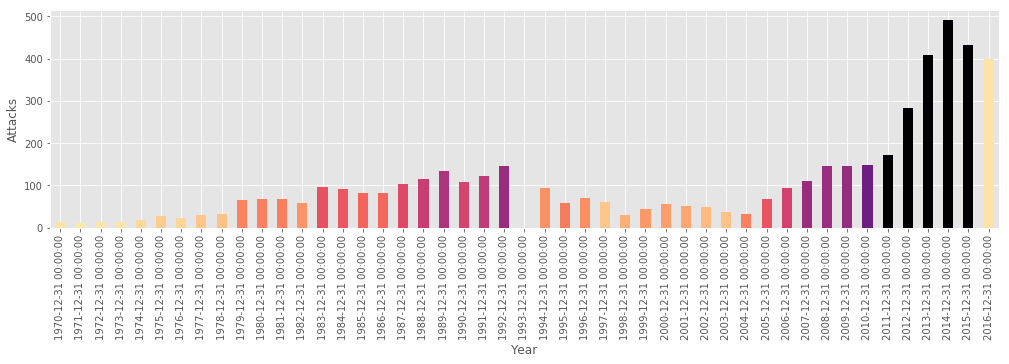

In [24]:
## View Global Terrorism attack years volumes by type
# x = terrorism_df.groupby(terrorism_df.datetime.dt.year).count()

# x = terrorism_df.set_index(pd.DatetimeIndex(terrorism_df.datetime))
# x = x.sort_index()
# y = x.groupby(x.index).count()
# y.plot(y['datetime'], y['eventid'])


annual_df = terrorism_df.set_index('datetime')
x = annual_df.groupby(pd.Grouper(freq='Y')).size()

## WHAT IF SOME DATETIME INDEXES ARE REPEATED?!?!
#x.plot(kind='bar', cmap='magma_r')

#y# y['eventid'].plot(kind='bar', cmap='magma_r')
# pd.Grouper(freq="M")
# x['eventid'].plot(kind='bar', cmap='magma_r')

# x
# x = terrorism_df['iyear'].value_counts().sort_index()
# x.index.astype(date)
# xx = pd.DataFrame(x).plot(x=xx.index,y='iyear')
# xx
# x.plot(kind='bar', cmap='magma_r')
# x['imonth'].unstack()#.plot(kind='bar', cmap='magma_r')
fig_size_bi = (17,4)

x.plot(kind='bar', figsize=fig_size_bi, color=cm.magma_r(terrorism_df.groupby(['iyear']).size()))
# x.plot(kind='bar', figsize=fig_size_bi, cmap='magma_r')
# pd.DataFrame(x).plot(kind='bar',cmap='magma_r')
plt.xlabel('Year')
plt.ylabel('Attacks')



### A Note on Color Maps

Looking at the above charts, one might ask: "Why use those specific colors and not others?"

The choice of a colormap is in part subjective, but some objective qualities can be applied to help make the determination. Primarily, we care to distinguish our data's **sequential** nature from time-step to time-step.

In the above case, the visualization serves to show fluctuating intensities across time (though we will get to better methods for this). Color maps can be grouped into the following: {**Perceptually Uniform Sequential**, **Sequential**, **Miscellaneous**}.

- **Miscellaneous**
 - The majority of color maps. These can be palettes designed purely for aesthetics. Many are designated for categorical data while others have arbitrarily chosen interpolations between 2 subjective colors.
- **Sequential**
 - Humans register both light intensity and color. While intensity is more easily described by a single magnitude, there are many methods for parameterizing color (e.g. RGB, CMYK, etc.). Sequential methods attempt to describe a uniform 2D projection, given any color map, to genereate a consistent gradient along intensity. 
- **Perceptually Uniform Sequential**
 - These projections take the sequential aspect one step further and, instead of simply progressing in the "correct" direction of a color gradient, they attempt to make all steps "equal". Further complicating this is the fact that individual color maps behave differently with perceived intensity. Regardless, most occassions are "best" visualized by this category of color maps.
 

Let's test this by viewing the same graphs, but with data labels obscured.

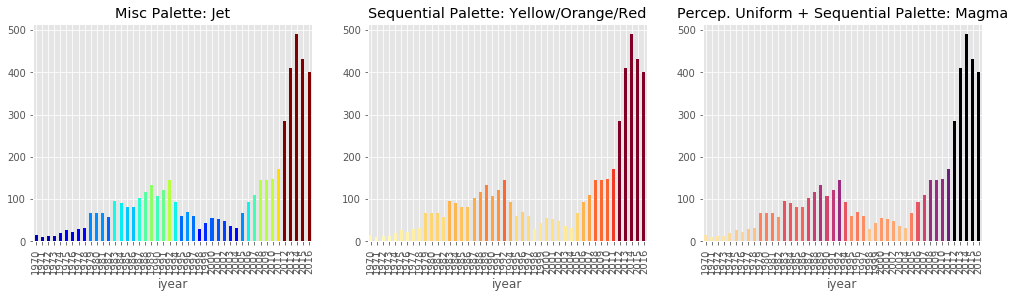

In [22]:
## View Global Terrorism attack weapon volumes by type
# colors = cm.get_cmap('jet')
x = terrorism_df.groupby(['iyear']).size()
fig_size_bi = (17,4)

plt.subplot(1, 3, 1)
x.plot(title='Misc Palette: Jet', kind='bar', figsize=fig_size_bi, color=cm.jet(terrorism_df.groupby(['iyear']).size()))
plt.subplot(1, 3, 2)
x.plot(title='Sequential Palette: Yellow/Orange/Red', kind='bar', figsize=fig_size_bi, color=cm.YlOrRd(terrorism_df.groupby(['iyear']).size()))
plt.subplot(1, 3, 3)
x.plot(title='Percep. Uniform + Sequential Palette: Magma', kind='bar', figsize=fig_size_bi, color=cm.magma_r(terrorism_df.groupby(['iyear']).size()))

#### Brief Analysis:

Scanning left to right on the above graphs, more sensibile color maps become immediately apparent.

Objective Objective:
 - In Jet, the transitions from Blue to Green and Yellow to Deep Red are incongruous. This is because it is stepping through perceived luminence via bright colors before returning to dark. Sequential maps will attempt to pair the two.

Subjective Evaluation:
 - The start and end points of the color map are important. Using Jet as an example, the center of the map uses green, which is commonly used to suggest optimality or normality. In this scenario, however, we would not want to suggest **normal** levels of global terror.

## Pie-Charts:

Pie charts are an introductory way to display numerical proportions or relative sizes of data. It works best to show proportions between a small number of variables, typically less than 12. If too many variables are displayed the chart is less readable and thus less effective. Pie charts are well suited if you only want to see simple proportions. For example, the proportion of grades for an exam. It won't provide informaion as to how previous grades may have changed unless you have multipule charts.  Below is an example of pie charts showing different proportions of attacks in regards to dates. The charts can be further enhanced to add more description. The features that were added include, different colored slices and percetanges of each
slice [9].

Text(0,0.5,'')

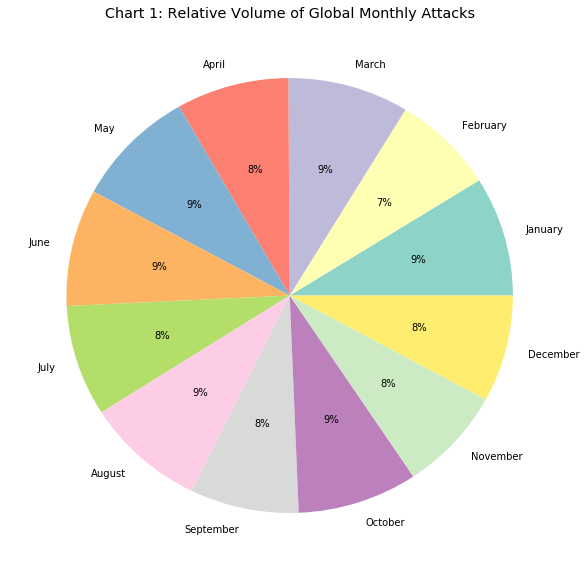

In [11]:
## Display the monthly volume of attacks
MONTHS = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'] 
x = terrorism_df.groupby(['imonth']).size() #groups the events by month and counts them, creates a ne dataframe with this reduction

x.index = MONTHS #What we want our chart to display proportions of
x.plot(title='Chart 1: Relative Volume of Global Monthly Attacks',
       kind='pie', #type of plot
       cmap='Set3', #colors
       autopct='%1.0f%%', #displayes percentage
       figsize=(10,10)
      )
plt.ylabel("")# removes the "none" lable

### Chart 1:

#### Brief Analysis
This clearly shows that the gross volume of terrorist events occur relatively uniformly, when considering all groups (e.g. global, weapon types, etc.). However, this does not easily scale to showing variations of slices one might be interested in examining, such as seasonal trends across regions.

#### Pros
- Cyclical patterns which are easy to read and understand
 - Annual patterns
     - Monthly changes over year don't come out (compare to time line)
     - Some monthly patterns are balanced out over the globe (Middle East).
 - Categorical imbalances
     - Gun types
 - Interval level data?


### Other Examples of Pie Charts:



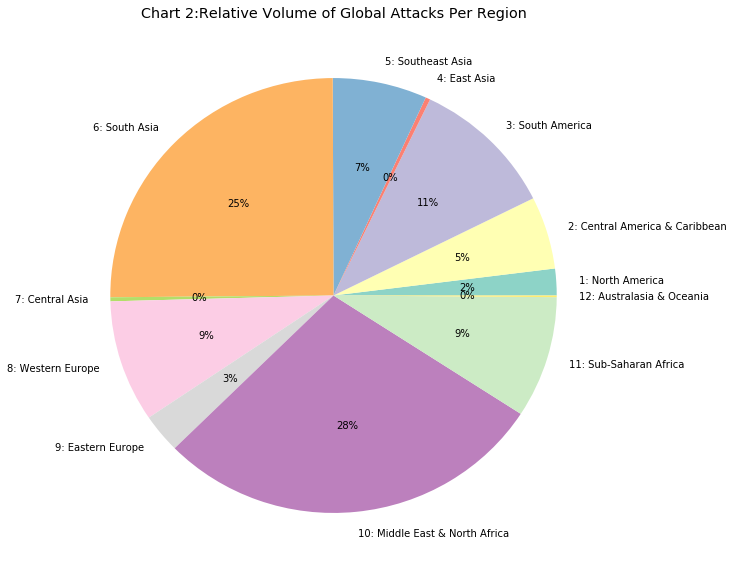

In [12]:
## Display the monthly volume of attacks per region
#MONTHS = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          #'August', 'September', 'October', 'November', 'December']
Region = ['1: North America','2: Central America & Caribbean','3: South America','4: East Asia','5: Southeast Asia','6: South Asia',
          '7: Central Asia','8: Western Europe','9: Eastern Europe',
          '10: Middle East & North Africa','11: Sub-Saharan Africa', '12: Australasia & Oceania']
x_region = terrorism_df.groupby(['region']).size()

x_region.index = Region
x_region.plot(title='Chart 2:Relative Volume of Global Attacks Per Region',
              kind='pie',
              cmap='Set3', 
              autopct='%1.0f%%',
              figsize=(10,10),
             )
ax = plt.ylabel("") # so the chart doesn't display "none"

### Chart 2 
#### Brief Analysis:
Above is an example of a pie chart displaying the proportions of attacks per regions. The chart is more difficult to read, but does give a quick prespective of the two highest regions. 

Note: The numbers indicate regions assigned accoring to the GTD Codebook. Some regions contain many different countries and it is difficult to tell what thy may be. Unlike the numbers assigned to months as per the U.S. are universal. It also seems unusual to have multipule regions with 0% and it is difficult to understand if this is a bug or accurate. 

## Histograms:

Like the Bar chart, the histogram is useful for examining the frequency distribution of data. Unlike the bar chart, the histogram charts one numerical variable. It provides indicatiors of the spread, distribution type, possible outliers, skewdness, and center of the variable being represented.  

Annual attack volumes by vector


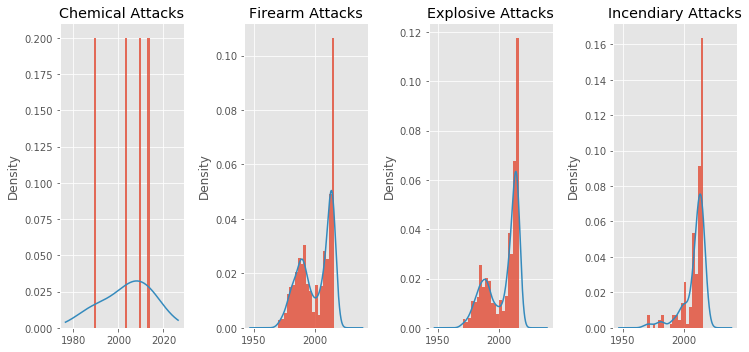

In [13]:
# x = terrorism_df.groupby(['region', 'weaptype1']).size()
nbc_attacks = terrorism_df[terrorism_df['weaptype1'].isin([1,2,3,4])]
other_attacks = terrorism_df[~terrorism_df['weaptype1'].isin([1,2,3,4])]

x = pd.get_dummies(terrorism_df['weaptype1']) # "one hot encode" the weapon types
x.columns
plt.subplot(1, 3, 1)

weaptype1_col_defs = {2:'Chemical', 5:'Firearm' ,6:'Explosive' ,8:'Incendiary' ,9:'Melee' }

print('Annual attack volumes by vector')
for i, col in enumerate(x.columns[:-1]):
    plt.subplot(1, 5, i+1)
    terrorism_df['iyear'][x[col] == 1].plot.hist(
        density=True,
        alpha=0.8,
        figsize=(13,5),
        title=weaptype1_col_defs[col]+" Attacks",
        bins=20,
    )
    
    terrorism_df['iyear'][x[col] == 1].plot.kde(
        figsize=(13,5),
    )
plt.tight_layout()

#### Brief Analysis: 
By comparing the frequency of each weapon type (attack vector), we can view the relative distributional changes over time, regardless of the normative changes. This will give cursory answers to questions regarding the differences in underlying distributions, informing more formal tests such as an analysis of variance (ANOVA).

#### Sample Questions:
* Do all weapon attack types monotonically increase or decrease over time?
* Are all attack vectors similar in distribution?
* Is there possibly covariance between some paired attack vectors?


More concretely, as the kernel density estimation is sensitive to relative changes in the distribution as each time step increases, it is equally likely to overfit across each categorical type's frequency distributions. As such, the combination of the KDE superimposed on the histogram makes the volumetric changes more apparent. It is clear that, while all attack types appear to share similar periods of high frequency, some distributions share a stronger bi-modal signal (i.e. Firearm, Explosive, and Melee attacks).

## Box and Whisker Plots:

### Strengths

- Conveys distributional statistics: (mean/median)
- Notion of skewness through strict parameters
- Since there is tight parameterization, it is simpe to contrast datasets.
- Relatively simple to compute, as it is based on 5 simple computations.
- Display outliers.

### Weaknesses
- The distributions are tightly parameterized, so there is significant distributional information lost.
- Outlier calculation falls into the realm of 'descriptive statistics', as it's an opinionated value. While it is useful to show the sparsity of long distributional tails, it is inaccurate. This quickly gives rise to questions regarding whether or not these outliers are descriptive of the underlying population distribution, which the high bias box plot parameters are unequipped to solve.

### Example Use-Case

Taking the existing dataset, we can view ratio-level distributions over several groups. In this case, we wish to view the differences in ransom values by region.

The first challenge for simple statistics is that there are clear magnitude differences across regions which might potentially obscure the distributional effects we wish to view. To slightly normalize each group, but maintain ordinal magnitudes, the ransom values can be viewed in the natural log (ln) space.

### Region Identifiers
1 = North America, 2 = Central America & Caribbean, 3 = South America, 4 = East Asia, 5 = Southeast Asia, 6 = South Asia, 7 = Central Asia, 8 = Western Europe, 9 = Eastern Europe, 10 = Middle East & North Africa, 11 = Sub-Saharan Africa

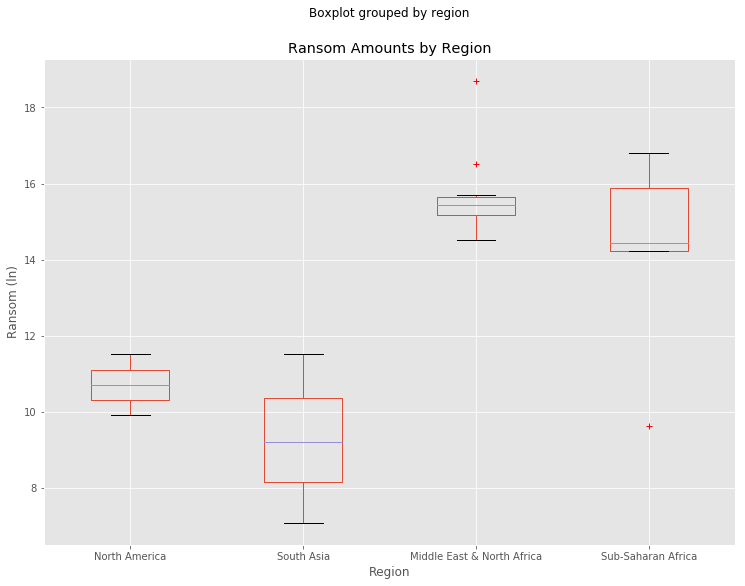

In [14]:
box_cols = ['ransomamtus', 'region']#, 'propvalue', 'region']
box_df = pd.read_csv('./inputs/globalterrorismdb.csv', usecols=box_cols, encoding='ISO-8859-1')
x = box_df.dropna(subset=['ransomamtus'])

x = x[x['ransomamtus'] > 0]

x['ransomamtus'] = np.log(x['ransomamtus'])
x = x.loc[x['region'].isin([1, 6, 10,11])]

bp = x.boxplot(by='region', sym='r+', figsize=(12,9),)
plt.ylabel('Ransom (ln)')
plt.xlabel('Region')
plt.title('Ransom Amounts by Region')
ticks = plt.xticks([1,2,3,4], ('North America', 'South Asia', 'Middle East & North Africa', 'Sub-Saharan Africa'))


#### Brief Analysis:
In the above figure, it is immediately clear which regions have higher median ransom demands, as well as the relative skewedness of each distribution. This is a common visualization for price discrimination analyses. Applied here, one could ask whether they were getting a <em>fair</em> ransom, given their region.

Although the relative distributional qualities are maintained, what is missing is the relative frequency. Box plots do not allow users to view modal information or otherwise guess at the convergence to a stable representation. For this reason, box plots are frequently combined with similarly grouped histograms, as they are perfect compliments.

## Scatter Plots: 
Can see how some of the data may be realted based on scatter plots generated:
    1. Latitude vs Longitude shows us the location of attacks. 
        *Could underlay a map to get a better visual if wanted.    

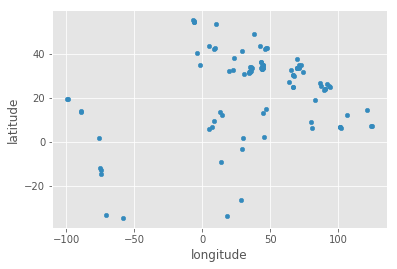

In [15]:
year_lat_df = terrorism_df[0:100][['latitude', 'longitude']]

year_lat_df.plot.scatter(x='longitude',y='latitude')

### Testing clustering on Latitude and Longitude
      1. Use K-means algorthim to cluster points to two groups based on "closeness"
      2. Use colormap to view the different clusters

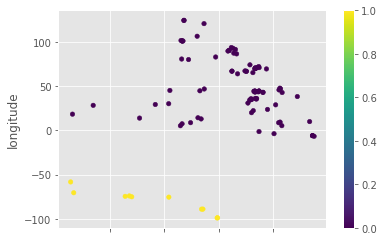

In [16]:
from sklearn.cluster import KMeans

cl = sk.cluster.KMeans(n_clusters=2).fit(year_lat_df)

year_lat_df.plot.scatter(x='latitude',y='longitude', c=cl.labels_, colormap='viridis')

### One hot encoding:

One hot encoding deals with our categorical variables by creating an <em>n-dimensional</em> row vector per category.

* Specify columns
* Get dummy variables
    * Optionally append to previous dataframe

In [17]:
#create new data frame with the dummy variables included
t_dummies_df = pd.get_dummies(terrorism_df, columns=['weaptype1', 'region'], dtype=bool)

## Pair Plots:

Also known as a scatter plot matrix, these plots show how single variables are distributed, as well as, realtionships between paris of values. It uses histograms and scatterplots to display relationships [15]

### Strengths:
- One function gives multiple plots, saving time.
- Compare different variables quickly.
    - Quickly filter out unnecessary data (e.g. redundant varianbles, uninteresting variables).
- Similar strengths as the Histograms and Scatter Plots.
    - Compresses two complimentary visualization types into one graph.
- Can be enhanced with attributes like, color and shape.


### Weakness:
- Some of the plots are not necessary and take up more space then needed.
- Some of the transposed plots can be redundent.
- Not all variables may be helpful to compare, but necessary if needing to compare with another one.
- Many bivariate scatterplots are difficult to interpret. Users still must pay careful attention to the datatypes of each feature.
- Pair plots grow poorly, by an exponential factor, making them computationally intractable for larger numbers of features. Depending on the desired use, users may have greater luck with iterative feature selection methodologies or non-graphical descriptive statistics.

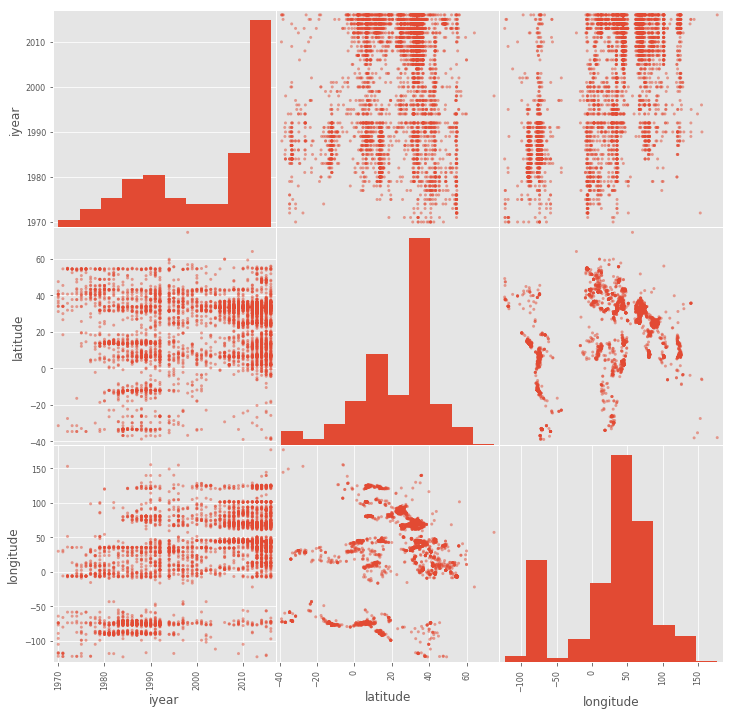

In [18]:
#Plots each variable with each other and displays a matrix of different plots
scatter_matrix(terrorism_df[['iyear', 'latitude', 'longitude']], figsize=(12, 12))
plt.show()

## Line Plots:

### Time Series graph for Regional Monthly Attacks

##### Observations
* 

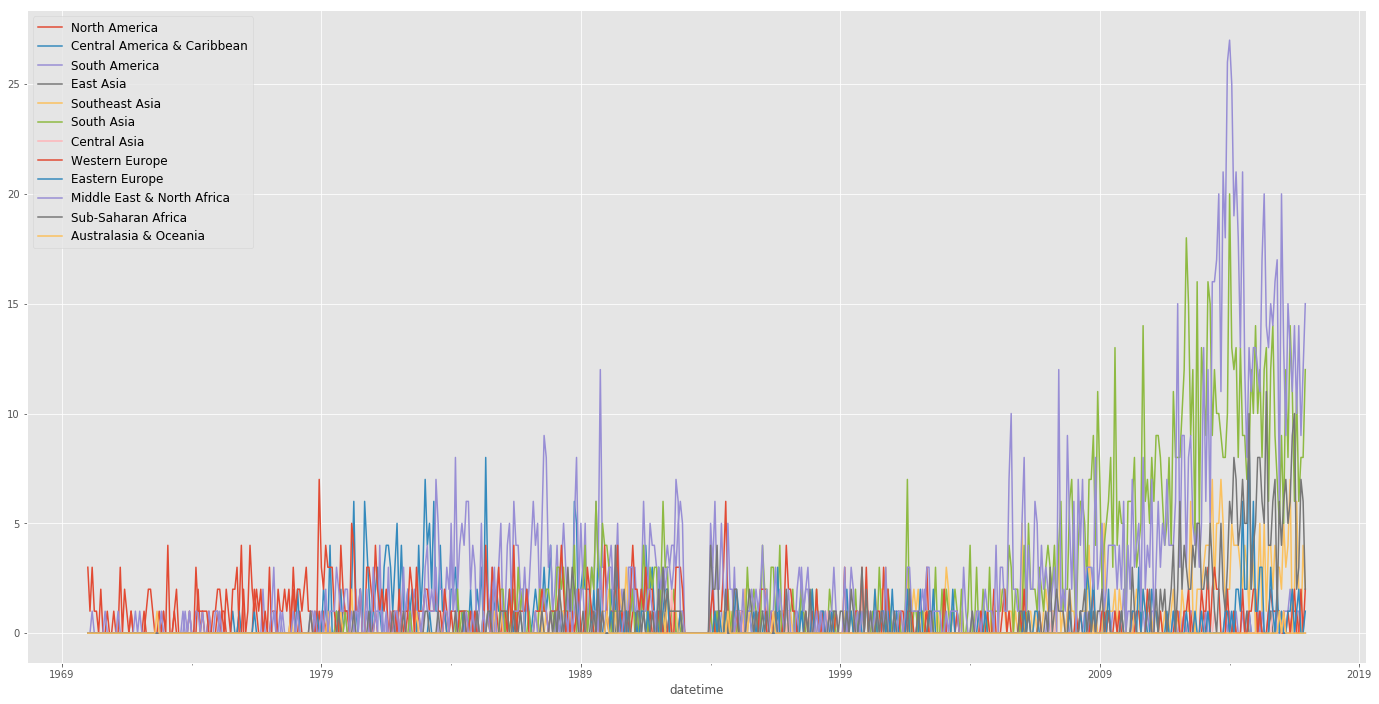

In [42]:
#Plot monthly trend for each region

datetime_df = terrorism_df.set_index('datetime')

# Separate each region into its own column.
regional_dummies = pd.get_dummies(datetime_df['region'])

# Aggregate each individual region's events by month-sized buckets. Plot the monthly sums.
ax = regional_dummies.groupby(pd.Grouper(freq='M')).sum().plot(kind='line', figsize=[24,12] )

Region = ['North America','Central America & Caribbean','South America','East Asia','Southeast Asia','South Asia',
          'Central Asia','Western Europe','Eastern Europe',
          'Middle East & North Africa','Sub-Saharan Africa', 'Australasia & Oceania']

# Replace column names with hardcoded region string values. Change Legend font-size.
ax.legend(Region, prop={'size': 12})


#  Example of A Data Exploration Possibility:
    Question:
        1. Is there a certain time during the year that attacks are more frequent?
    

### Time of Year:

We can examin possible trends related to the time of year events took place. Using a  pair plot/scatter matrix we can quickly see if there are any noticable patterns when comparing years, months, and days. Below is the corresponding code and output.

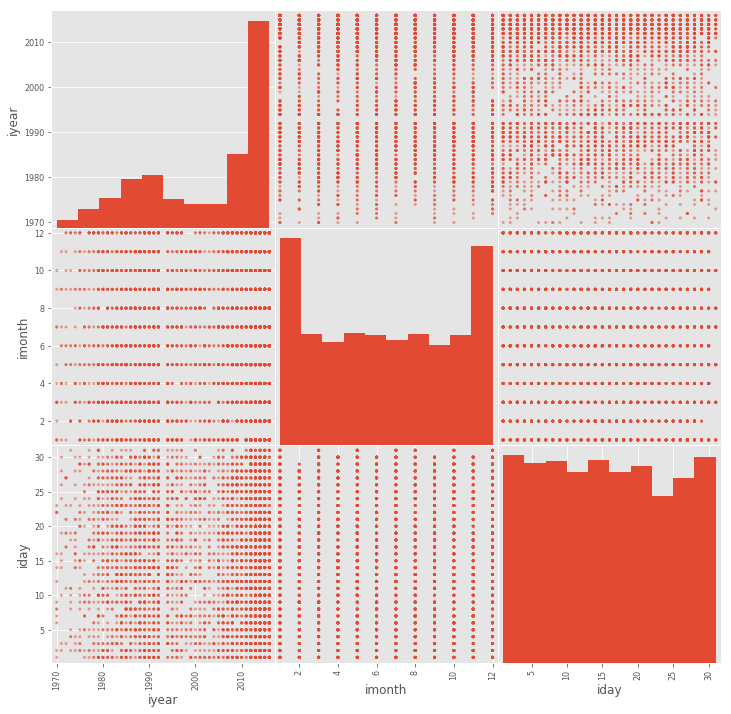

In [21]:
#View plot of months over years to see if any common/uncommon attack months
scatter_matrix(terrorism_df[['iyear', 'imonth', 'iday']], figsize=(12, 12))
#scatter_matrix(terrorism_df[['region']], figsize=(12, 12))
plt.show()

#Create a encoding that makes true/false columns for each month
#months_region_dummies_df = pd.get_dummies(terrorism_df, columns=['region'], dtype=bool)




#### Brief Analysis:

As shown in the first plot above (year vs year), there appears to be a dramatic increase of events after 2010, but we already knew that from our histogram. The bottom right plot (day vs day) does not appear to show anything significant. The scatter plots provide us with not information, but that isn;t suprising given the axies. The middle plot (month vs month) does appear to show an increase in event in the months of Janurary and December. This is somthing that can be furter explored. 

#### Further Exploration:

Given the noticable increase of events in the months if Janurary and December we can check for difference among regions as a possible explination.

### Global Monthly Trend
    Our graph above shows a possible global monthly trend for attack occurances. I am going to start exploring possible
    reasons for the frequency of attacks in Jan and Dec. 


#### Pair Plot of Jan and Dec dataframe to look for possible Region differences:

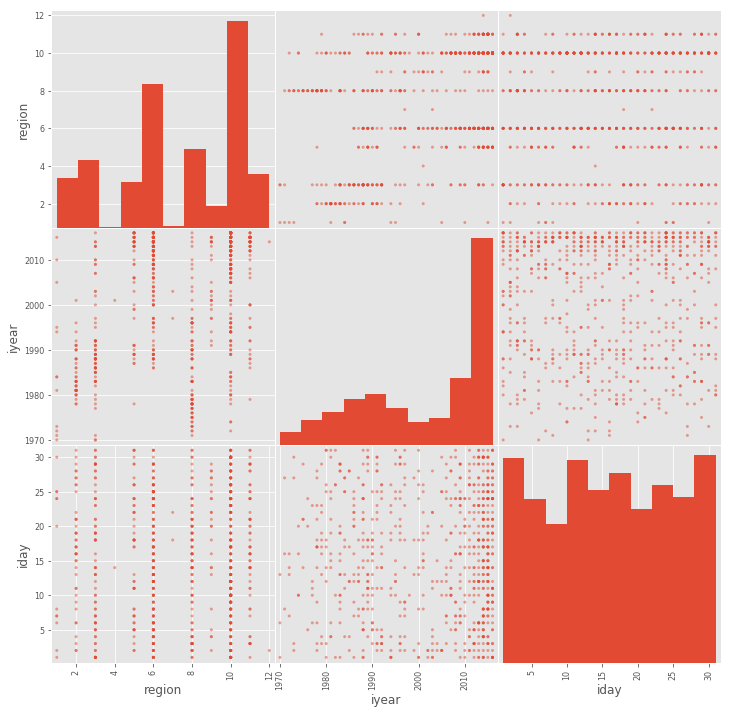

In [123]:
#Make new dataframe with only months of Jan and Dec
DecJan_terrorism_df = terrorism_df[((terrorism_df['imonth']== 1) | (terrorism_df['imonth'] == 12))]
#DecJan_terrorism_df = terrorism_df[(terrorism_df['iyear']>2011) & ((terrorism_df['imonth']== 1) | (terrorism_df['imonth'] == 12))]
scatter_matrix(DecJan_terrorism_df[['region', 'iyear', 'iday']], figsize=(12, 12))
plt.show()

#DecJan_terrorism_df.iloc[0:]

#year_lat_df = DecJan_terrorism_df[0:100][['latitude', 'longitude']]
#year_lat_df.plot.scatter(x='longitude',y='latitude')

#### Brief Analysis:
As shown above in the first plot (region vs region), region 6 and 10 account for over half the number of attacks. There does not appear to be any trends as to the day. The only noticable trend for years, is the dramatic increace after 2010. 

#### Further Exploration:
Will removing these regions effect our monthly trend? Below is the code and corresponding output when removing regions 6 and 10.

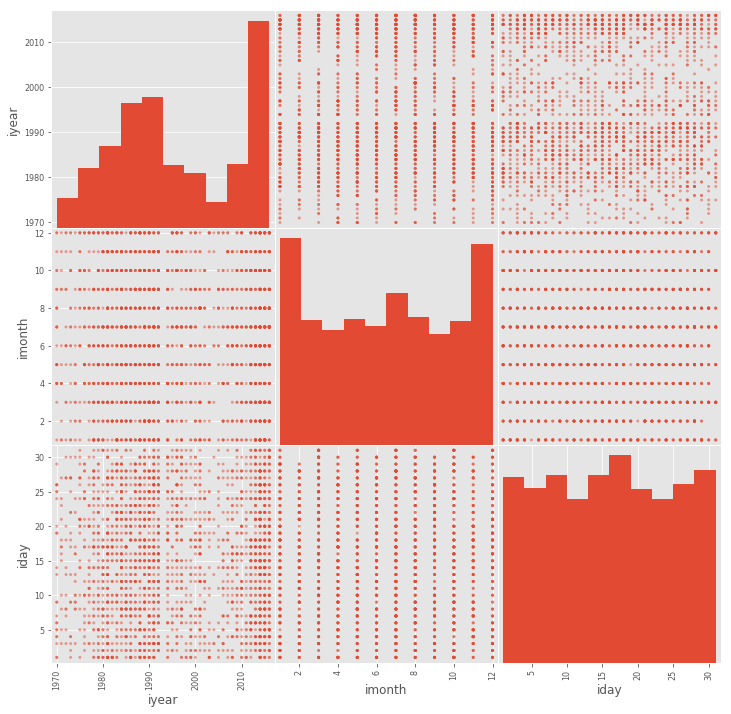

In [124]:
#make a new dataframe removing region 10 & 6:
region_df = terrorism_df[((terrorism_df['region'] != 10) & (terrorism_df['region'] !=6))]

scatter_matrix(region_df[['iyear', 'imonth', 'iday']], figsize=(12, 12))
plt.show()

#region_df.iloc[0:]

#### Brief Analysis:

After removing regions 6 and 10, the monthy trend appears about the same. This tells us it can't not be explained based on regional differences alone.

#### Further Exploration:
For a quick visual of the distribution among regions we can use a map overlay on top of our locational scatter plot. This example is displayed below. 

## Map Overlays:
Map Overlay is a great way to visualize scatter plots with latitude and longitude axies. It makes it easy to visually compare different areas and draw some initil conclusions or ideas for further exploration. 

Text(0.5,0,'Global Attacks')

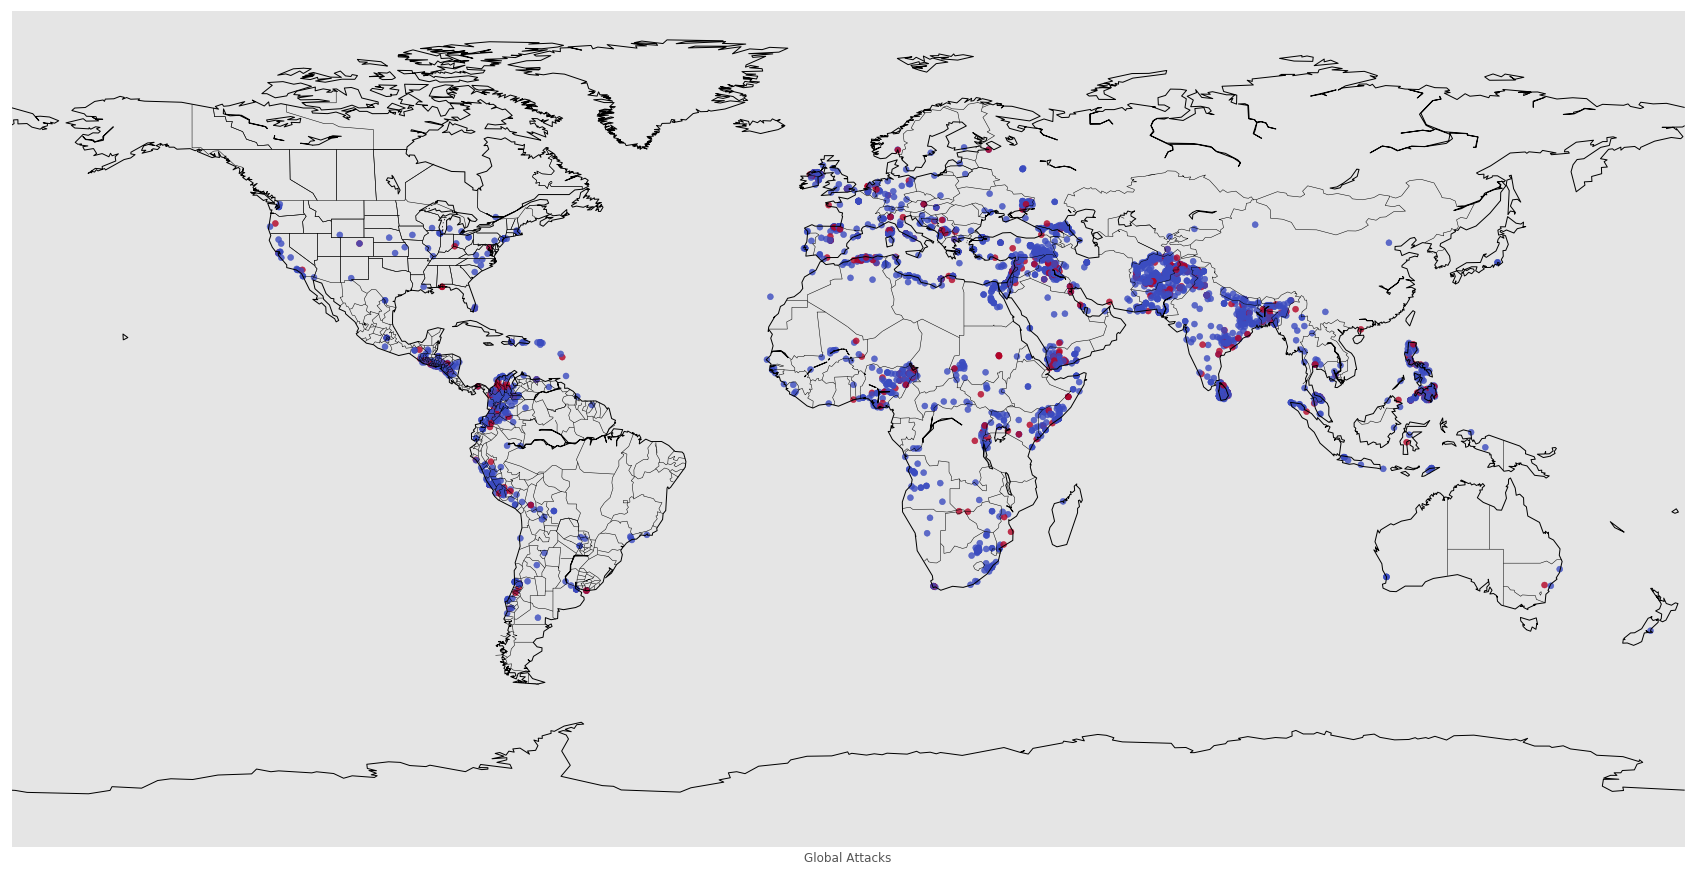

In [125]:
#make new column IS jan or Dec
#plot that with lat and long and color by "is Jan or Dec"
test_df = terrorism_df.copy()
test_df['is_jan_dec']= (test_df['imonth']== 12) |(test_df['imonth']==1)
#test_df.iloc[0:10]
#test_df.plot.scatter(x='longitude',y='latitude', c=test_df['is_jan_dec'], cmap='Wistia', figsize=[20,10])
# viridis

# DecJan_terrorism_df[(DecJan_terrorism_df['datetime'].dt.month == 12) | (DecJan_terrorism_df['datetime'].dt.month == 1)]

# year_lat_df = DecJan_terrorism_df[0:100][['latitude', 'longitude']]
# year_lat_df.plot.scatter(x='longitude',y='latitude')

fig, ax = plt.subplots(figsize = (30,30))
earth = Basemap(ax=ax)
earth.drawcoastlines()
earth.drawcountries()
earth.drawstates()

ax.scatter(test_df['longitude'], test_df['latitude'], c=test_df['is_jan_dec'] , 
           cmap = 'coolwarm', alpha=0.8)
ax.set_xlabel("Global Attacks")
#fig.savefig('usgs-monthly-4.5M.png')

#### Brief Analysis:

Above is the scatter plot of events by latitude and longitude. Each dot is an event and the red dots display the events that took place in Janurary or December.

Before when we noticed a peak in the pair plot data for the months of Janurary and December, we wondered if it could be region specific. After completing another pair plot removing the regions with the highest number of events, we did not see a change. Based on the distribution of events displayed on the map in Janurary and/or December, it seems the possible trend of increased events during those months is not region specific becasue they appear uniformly distributed vs localized. 

#### Advantage:
The map overlay was an easeier way to quickly see the distribiution of monthly events vs creating a combination of pair plots with certain regions removed.

#### Further Analysis:

At this point one could try to find other variables that could explain the possible trend using similr techniques or explore other patterns. 


# Conclusion

The above examples show an introduction to using visualizations in data analysis. There are many other advanced techniques and graphics, but the above graphs/plots are the foundations.  

# Refrences

[1] https://www.sas.com/en_us/insights/big-data/data-visualization.html

[2] https://www.python.org/ 

[3] http://jupyter.org/

[4] https://pandas.pydata.org/

[5] https://github.com/

[6] National Consortium for the Study of Terrorism and Responses to Terrorism (START). (2018). Global Terrorism Database [Data file]. Retrieved from https://www.start.umd.edu/gtd

[7] https://docs.python.org/3/library/datetime.html

[8] https://www2.le.ac.uk/offices/ld/resources/numerical-data/bar-charts

[9] https://www.mathsisfun.com/data/pie-charts.html

[10]

[11]

[12]

[14] 

[15] https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166